In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from tfmap import Atlus

Parsing spectra: 100%|██████████| 6732/6732 [00:58<00:00, 114.27it/s]


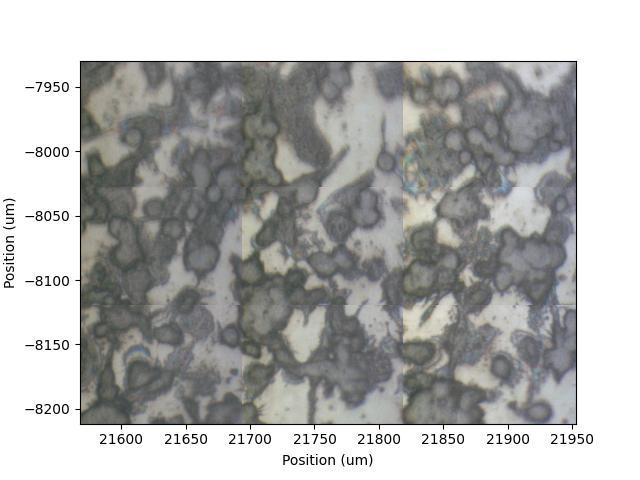

In [18]:
atlus = Atlus.from_map_filepath("../data/test.map")
atlus

Text(0, 0.5, 'Transmittance')

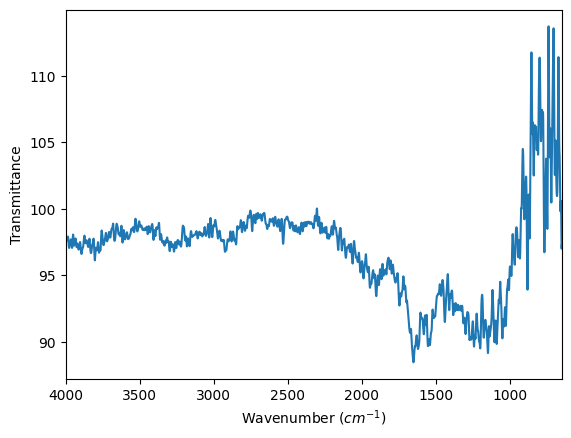

In [86]:
xaxis = np.linspace(650, 4000, 3475)
sample = atlus.spectra()[1234]

plt.plot(xaxis, sample)
plt.gca().invert_xaxis()
plt.xlim(4000, 650)
plt.xlabel("Wavenumber (${cm}^{-1}$)")
plt.ylabel("Transmittance")

Text(0, 0.5, 'Transmittance')

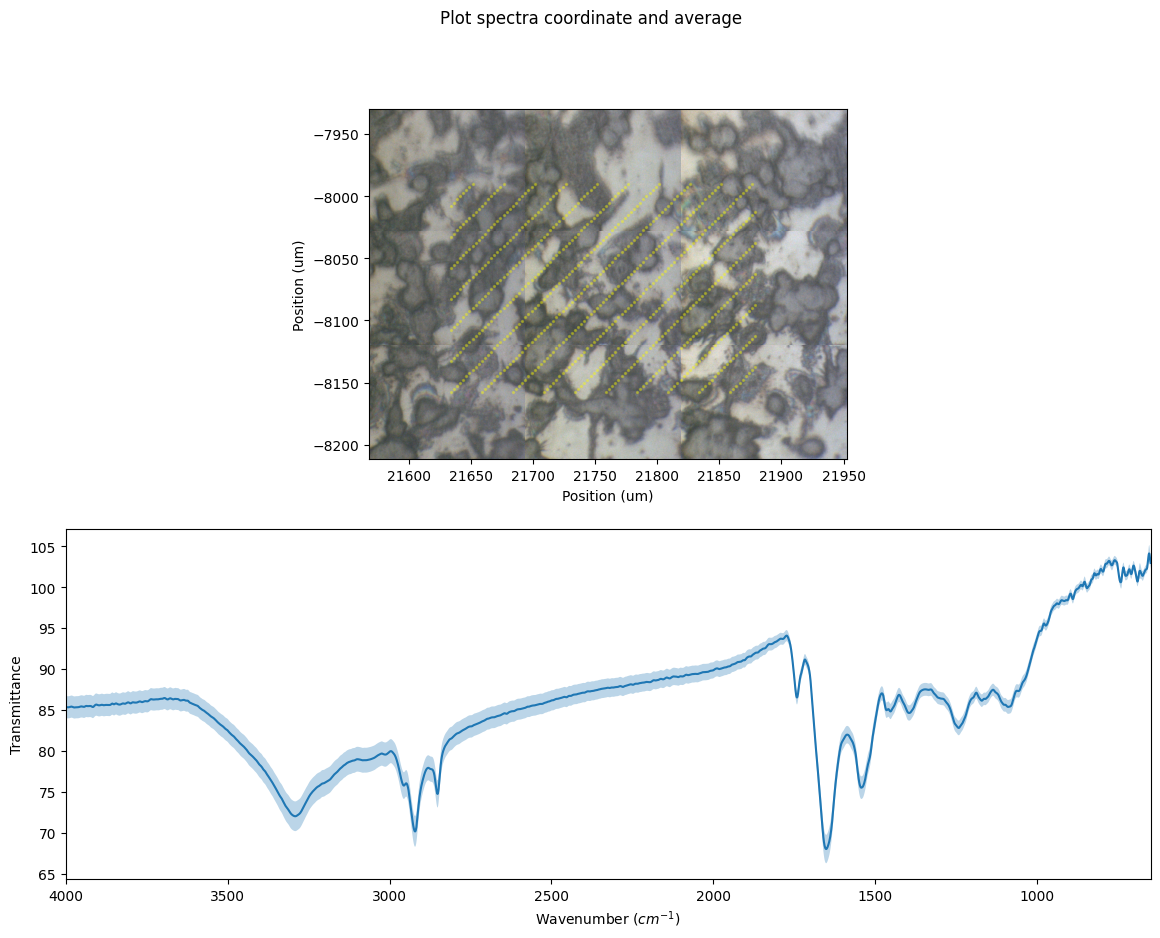

In [87]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

atlus.plot_rgb_image(ax=ax[0])
coords = dict(item for item in atlus.spectra_coordinates().items() if (item[0] % 10) == 0)
spectra = np.array([atlus.spectra()[idx] for idx in coords.keys()])
mean_spectra = np.mean(spectra, axis=0)
ci = 1.96 * (np.std(spectra, axis=0) / np.sqrt(spectra.shape[0]))
xs = np.array([coord[0] for coord in coords.values()])
ys = np.array([coord[1] for coord in coords.values()])
wavenumbers = np.linspace(650, 4000, 3475)

fig.suptitle("Plot subsampled spectra coordinates and average")
ax[0].scatter(xs, ys, s=2, c="yellow", alpha=0.3)
ax[1].plot(wavenumbers, mean_spectra)
ax[1].fill_between(wavenumbers, mean_spectra + ci, mean_spectra - ci, alpha=0.3)
ax[1].invert_xaxis()
ax[1].set_xlim(4000, 650)
ax[1].set_xlabel("Wavenumber (${cm}^{-1}$)")
ax[1].set_ylabel("Transmittance")